#                                                                         Machine Learning
    -------------------------------------------------------------------------------------------------------------------------
                                      Assignment - 01

In [37]:
import warnings
warnings.filterwarnings('ignore')

# 1. Decision Tree Regression

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [39]:
df= pd.read_csv('Data.csv')
df = df.head(7)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35


In [40]:
from sklearn import tree
model= tree.DecisionTreeRegressor()


In [41]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]



In [42]:
model.fit(X,y)



DecisionTreeRegressor()

In [43]:
X_train,X_test,y_train,y_test=tts(X,y,train_size=0.70)

In [44]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_pred

array([443.67, 446.48, 446.48])

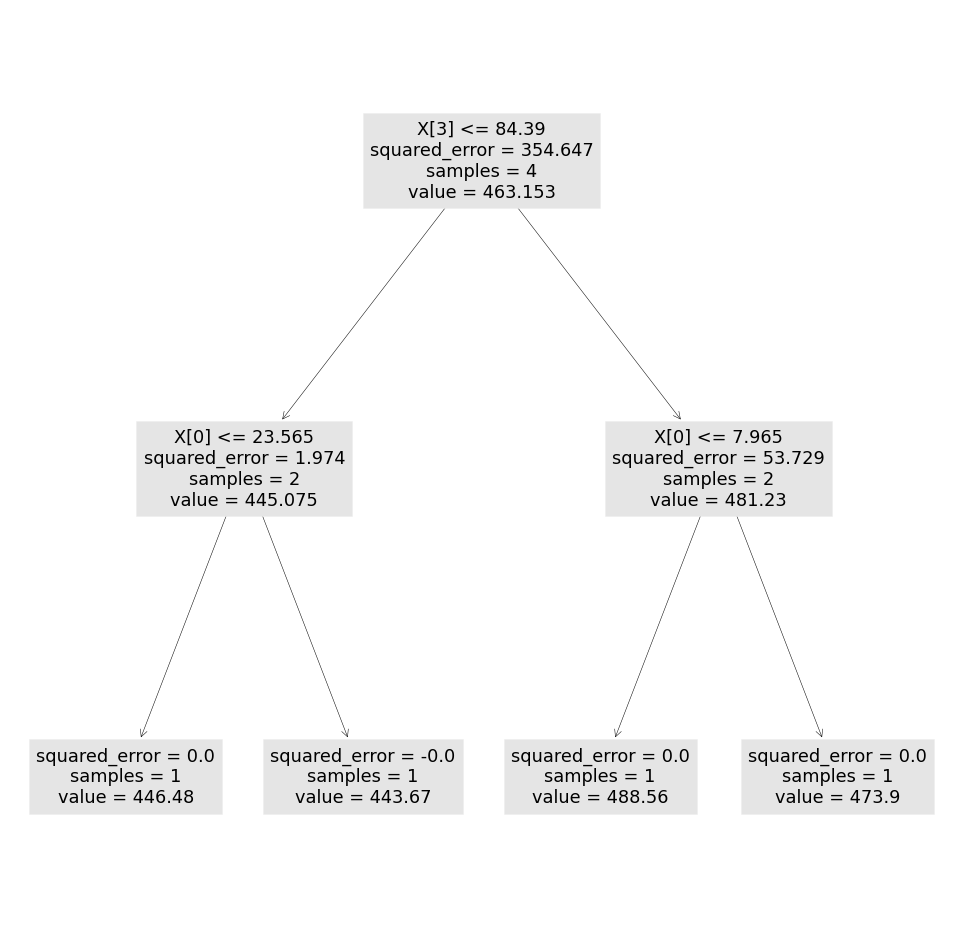

In [45]:
plt.figure(figsize=(17,17))
tree.plot_tree(model)
plt.show()

In [46]:
r2_score(y_test, y_pred)

-1.3876984909508248

# 2. Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() 


In [48]:
df= pd.read_csv('Data.csv')
df = df.head(500)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [49]:
X_train,X_test,y_train,y_test=tts(X,y,train_size=0.70)


In [50]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) 
y_pred


array([442.2068, 458.4036, 464.5845, 461.2675, 432.158 , 459.7964,
       473.1965, 469.3619, 477.1861, 458.4315, 443.467 , 469.0158,
       464.432 , 464.2957, 439.5895, 484.7011, 474.1949, 463.5044,
       472.5128, 459.3401, 484.4639, 464.5449, 473.7919, 435.9535,
       463.1619, 476.6807, 446.0808, 438.2456, 434.3638, 444.1728,
       454.8066, 435.8652, 465.501 , 474.0193, 484.0356, 460.199 ,
       432.5961, 440.5695, 473.4855, 481.7096, 470.35  , 448.6326,
       444.5446, 466.562 , 447.6838, 444.6999, 435.4064, 432.5611,
       474.215 , 444.7617, 449.2773, 470.2309, 464.8417, 447.1519,
       462.6625, 443.0394, 454.8432, 450.8727, 433.6542, 432.938 ,
       481.4752, 445.6771, 475.5638, 436.4193, 442.7337, 476.6676,
       480.0622, 443.5966, 439.8065, 468.1105, 444.5706, 439.8034,
       442.5931, 438.1698, 445.421 , 433.8558, 452.9204, 435.2147,
       446.277 , 457.4064, 434.8371, 464.3609, 478.8758, 439.6152,
       473.1983, 432.9128, 432.2871, 433.4325, 454.6353, 476.5

In [51]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  3.321975333333326
MSE:  17.657844415933308


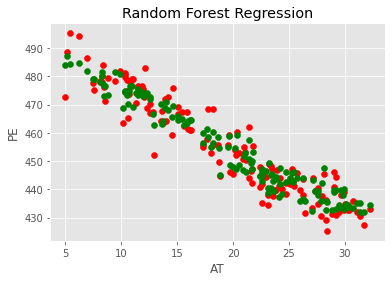

In [52]:
plt.scatter(X_test['AT'].values, y_test, color = 'red')
plt.scatter(X_test['AT'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show() 


In [53]:
r2_score(y_test, y_pred)

0.9402413763754414

# 3. Multiple Linear Regression

In [54]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=101)

In [55]:
mlr = LR()
mlr.fit(X_train,y_train)

LinearRegression()

In [56]:
print('Coefficients: \n', mlr.coef_)

Coefficients: 
 [-2.02583216 -0.21725999  0.0374248  -0.17017118]


In [57]:
predictions = mlr.predict(X_test)

r2_score(y_test, predictions)

0.9253509247615204

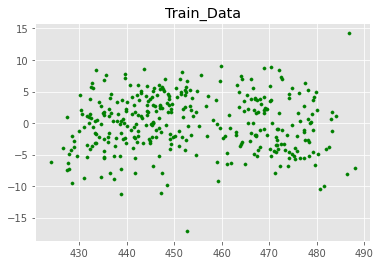

In [58]:
plt.title('Train_Data')
plt.scatter(mlr.predict(X_train), mlr.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.show()

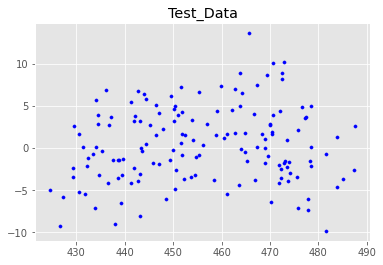

In [59]:
plt.title('Test_Data')
plt.scatter(mlr.predict(X_test), mlr.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
plt.show()

Text(0, 0.5, 'Predicted Y')

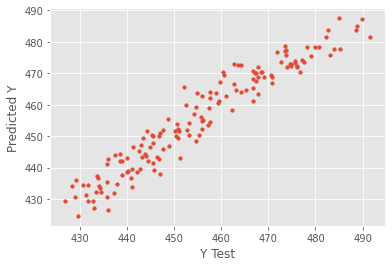

In [60]:
plt.scatter(y_test,predictions,s=13)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# 4. Polynomial Linear Regression

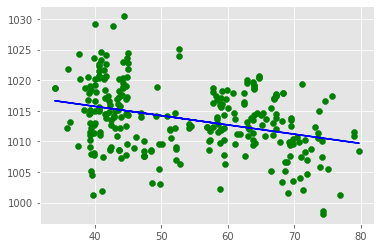

In [61]:
dataset = pd.read_csv('Data.csv')
dataset = dataset.head(275)
 
X = dataset.iloc[:,1:2].values  
y = dataset.iloc[:,2].values
 
# fitting the linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
 
# visualising the linear regression model
plt.scatter(X,y, color='green')
plt.plot(X, reg.predict(X),color='blue')
plt.show()

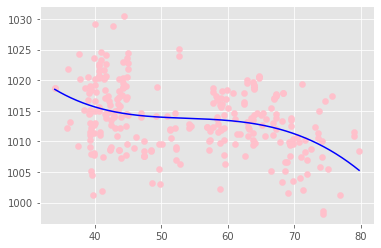

In [62]:
# visualising polynomial regression
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
 
poly_reg.fit(X_poly, y)
    
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)


  
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

plt.scatter(X,y, color='pink')   
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)),color='blue') 
plt.show()

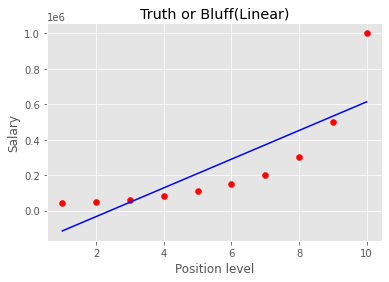

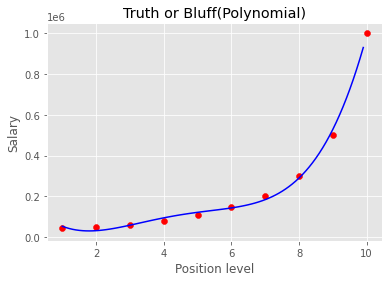

In [63]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset
 
X = dataset.iloc[:,1:2].values  
y = dataset.iloc[:,2].values
 
# fitting the linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
 
# visualising the linear regression model
plt.scatter(X,y, color='red')
plt.plot(X, reg.predict(X),color='blue')
plt.title("Truth or Bluff(Linear)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

 
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
  
# visualising polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
  
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

plt.scatter(X,y, color='red')  
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)),color='blue')  
plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [64]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=101)

In [65]:
# poly_reg.fit(X_train, y_train)
# y_pred = poly_reg.predict(X_test) 
# y_pred

In [66]:
#r2_score(y_test,y_pred)

# 5. Support Vector Regression

In [67]:
from sklearn.svm import SVR
import seaborn as sns

In [68]:
df= pd.read_csv('Data.csv')
df = df.head(100)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
95,20.02,67.32,1012.05,76.34,445.31
96,10.08,40.72,1022.70,67.30,480.80
97,27.23,66.48,1005.23,52.38,432.55
98,23.37,63.77,1013.42,76.44,443.86


In [69]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [70]:
y=y.reshape(-1,1)

In [71]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)